In [4]:
# load the dataset
data <- read.csv("Final_Project_Data.csv")

In [5]:
str(data)

'data.frame':	777 obs. of  18 variables:
 $ Row.                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ clonesize           : num  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 ...
 $ honeybee            : num  0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 ...
 $ bumbles             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ andrena             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ osmia               : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ MaxOfUpperTRange    : num  86 86 94.6 94.6 86 86 94.6 94.6 77.4 77.4 ...
 $ MinOfUpperTRange    : num  52 52 57.2 57.2 52 52 57.2 57.2 46.8 46.8 ...
 $ AverageOfUpperTRange: num  71.9 71.9 79 79 71.9 71.9 79 79 64.7 64.7 ...
 $ MaxOfLowerTRange    : num  62 62 68.2 68.2 62 62 68.2 68.2 55.8 55.8 ...
 $ MinOfLowerTRange    : num  30 30 33 33 30 30 33 33 27 27 ...
 $ AverageOfLowerTRange: num  50.8 50.8 55.9 55.9 50.8 50.8 55.9 55.9 45.8 45.8 ...
 $ RainingDays         : num  16 

In [11]:
library(tidyverse) # load Tidyverse
library(ggplot2) # load ggplot2

In [8]:
# Remove Row., fruitset, fruitmass, seeds columns----Variables that are not in interest of study.
df <- data %>%
select(-c(Row., fruitset, fruitmass,seeds))

In [10]:
str(df)

'data.frame':	777 obs. of  14 variables:
 $ clonesize           : num  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 ...
 $ honeybee            : num  0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 ...
 $ bumbles             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ andrena             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ osmia               : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ MaxOfUpperTRange    : num  86 86 94.6 94.6 86 86 94.6 94.6 77.4 77.4 ...
 $ MinOfUpperTRange    : num  52 52 57.2 57.2 52 52 57.2 57.2 46.8 46.8 ...
 $ AverageOfUpperTRange: num  71.9 71.9 79 79 71.9 71.9 79 79 64.7 64.7 ...
 $ MaxOfLowerTRange    : num  62 62 68.2 68.2 62 62 68.2 68.2 55.8 55.8 ...
 $ MinOfLowerTRange    : num  30 30 33 33 30 30 33 33 27 27 ...
 $ AverageOfLowerTRange: num  50.8 50.8 55.9 55.9 50.8 50.8 55.9 55.9 45.8 45.8 ...
 $ RainingDays         : num  16 1 16 1 24 34 24 34 16 1 ...
 $ AverageRainingDays  : n

In [17]:
sum(is.na(df)) # checking missing values

[1] 0

In [19]:
install.packages("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.90             FALSE



installing the source package 'corrplot'



In [20]:
library(corrplot)

corrplot 0.90 loaded


In [22]:
rquery.cormat(df, type="upper")

ERROR: Error in rquery.cormat(df, type = "upper"): could not find function "rquery.cormat"


In [24]:
cor_matrix = cor(df)

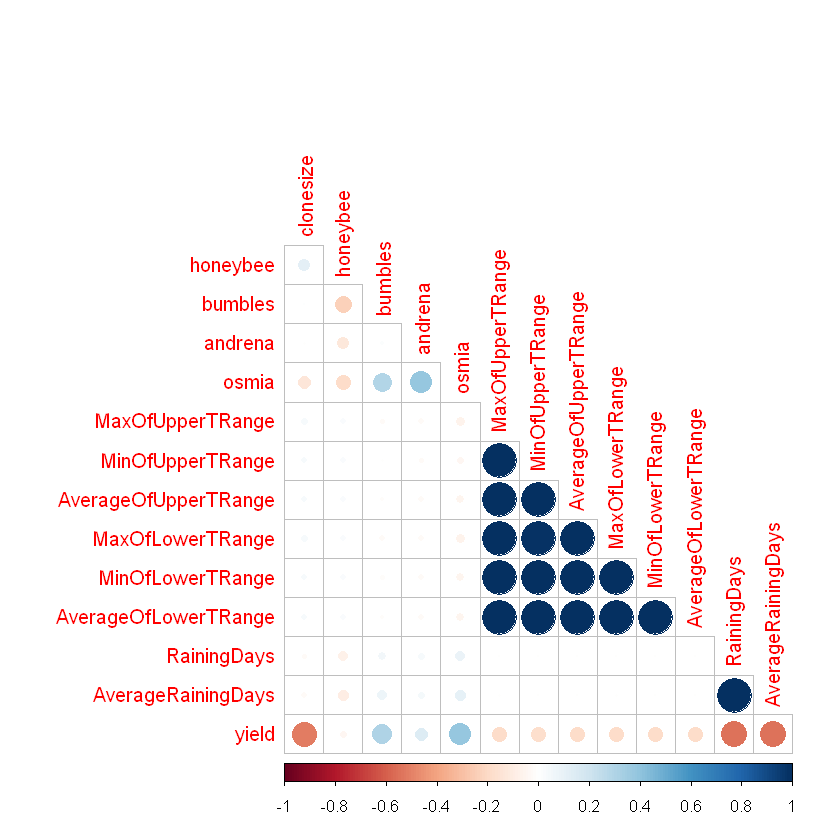

In [33]:
corrplot(cor_matrix, type = "lower",diag = F)

In [34]:
# HAndle Mutlicollinearity
# remove MinofUpperTRange, MAxofUpperTrange,MinOfLowerTRAnge, MAxofLowerTRange
df1 <- df%>%
select(-c(MaxOfUpperTRange,MinOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange))

In [35]:
str(df1)

'data.frame':	777 obs. of  10 variables:
 $ clonesize           : num  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 ...
 $ honeybee            : num  0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 ...
 $ bumbles             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ andrena             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ osmia               : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ AverageOfUpperTRange: num  71.9 71.9 79 79 71.9 71.9 79 79 64.7 64.7 ...
 $ AverageOfLowerTRange: num  50.8 50.8 55.9 55.9 50.8 50.8 55.9 55.9 45.8 45.8 ...
 $ RainingDays         : num  16 1 16 1 24 34 24 34 16 1 ...
 $ AverageRainingDays  : num  0.26 0.1 0.26 0.1 0.39 0.56 0.39 0.56 0.26 0.1 ...
 $ yield               : num  3813 4948 3867 4304 3436 ...


In [36]:
cor_matrix1 = cor(df1)

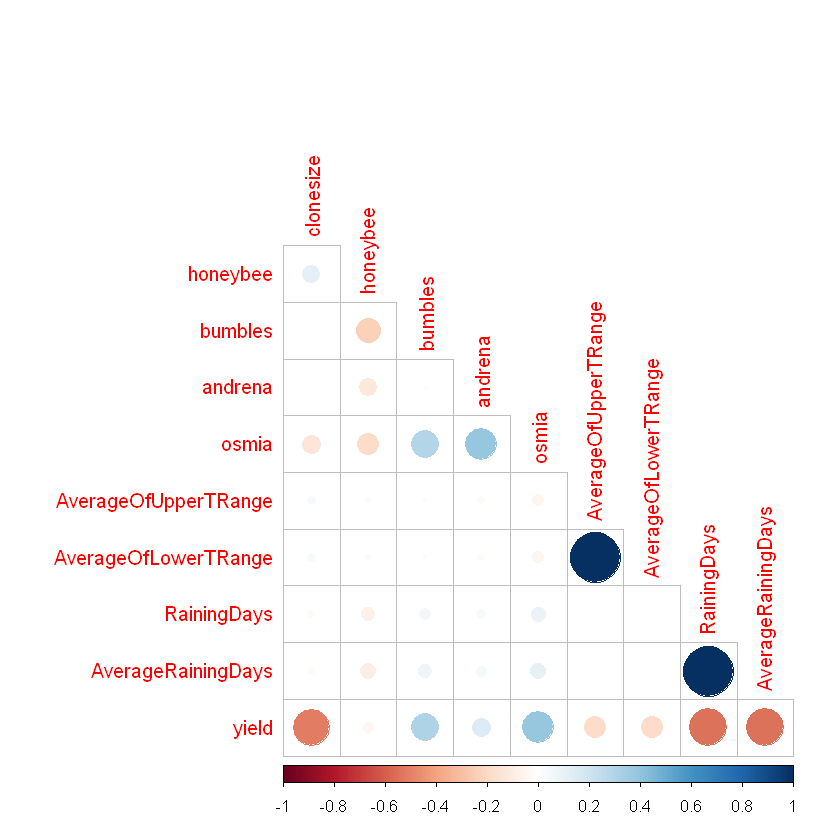

In [37]:
corrplot(cor_matrix1, type = "lower",diag = F)

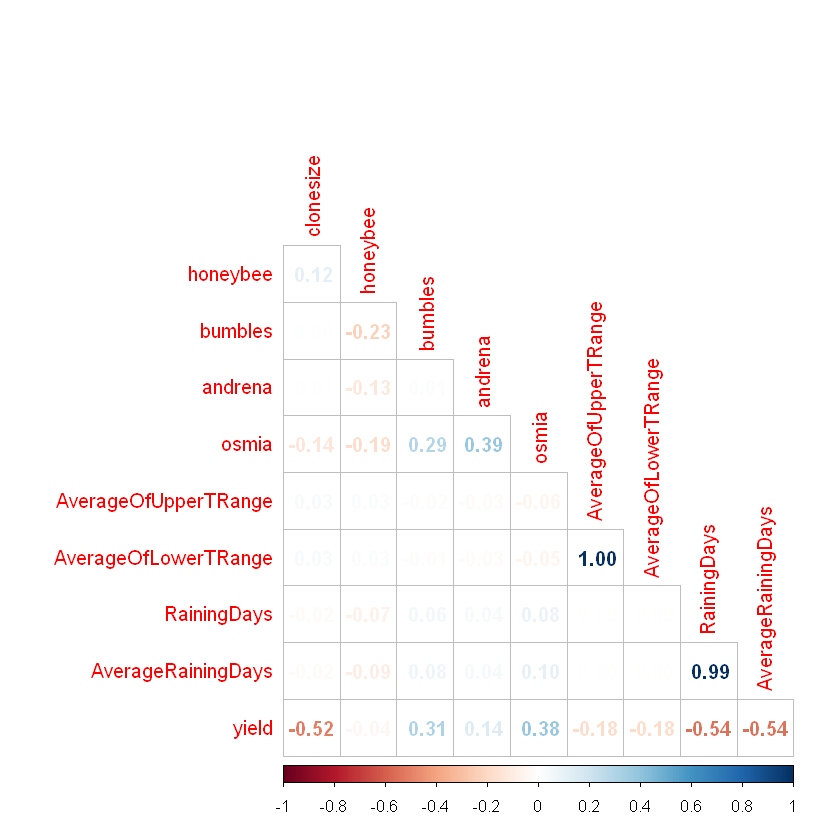

In [39]:
corrplot(cor_matrix1, type = "lower",diag = F, method = 'number')

In [ ]:
# AverageOfLowerTRAnge highly correlated to Averageof UpperTRange---- 
# and RAinning Days is highly correlated to avgrainning days
# Remove one var from each


In [40]:
df1<-df1 %>%
select(-c(RainingDays, AverageOfLowerTRange))


In [41]:
str(df1)

'data.frame':	777 obs. of  8 variables:
 $ clonesize           : num  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 ...
 $ honeybee            : num  0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 ...
 $ bumbles             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ andrena             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ osmia               : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ AverageOfUpperTRange: num  71.9 71.9 79 79 71.9 71.9 79 79 64.7 64.7 ...
 $ AverageRainingDays  : num  0.26 0.1 0.26 0.1 0.39 0.56 0.39 0.56 0.26 0.1 ...
 $ yield               : num  3813 4948 3867 4304 3436 ...


In [43]:
# Run Regression Model 
ln_model1 = lm(yield ~ . ,data = df1) 


In [45]:
summary(ln_model1)


Call:
lm(formula = yield ~ ., data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2551.12  -397.55    61.72   447.73  1377.42 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           7925.129    237.843  33.321  < 2e-16 ***
clonesize              -97.019      3.112 -31.177  < 2e-16 ***
honeybee               127.461     22.916   5.562 3.68e-08 ***
bumbles               6043.678    347.338  17.400  < 2e-16 ***
andrena                516.939    145.705   3.548 0.000412 ***
osmia                 2184.922    146.952  14.868  < 2e-16 ***
AverageOfUpperTRange   -26.245      2.789  -9.411  < 2e-16 ***
AverageRainingDays   -4744.040    125.862 -37.692  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 595.2 on 769 degrees of freedom
Multiple R-squared:  0.8093,	Adjusted R-squared:  0.8076 
F-statistic: 466.3 on 7 and 769 DF,  p-value: < 2.2e-16


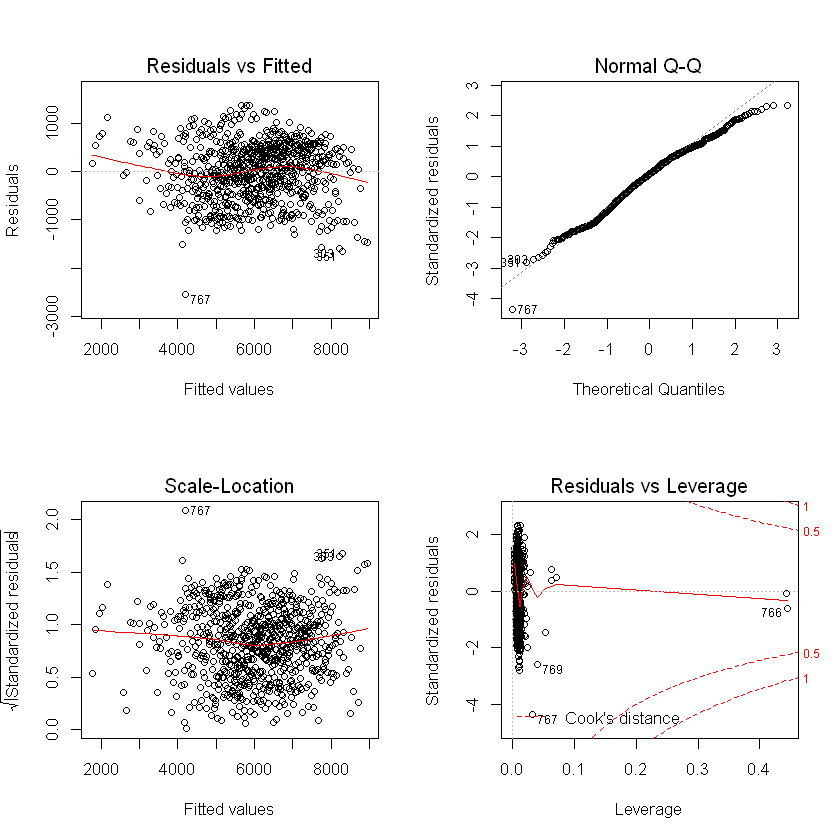

In [47]:
# Check the REsiduals and Normal-QQ plot
par(mfrow=c(2,2))
plot(ln_model1)

In [ ]:
# EDA and Visualizations
# Box plot of target VAriable
Boxplot

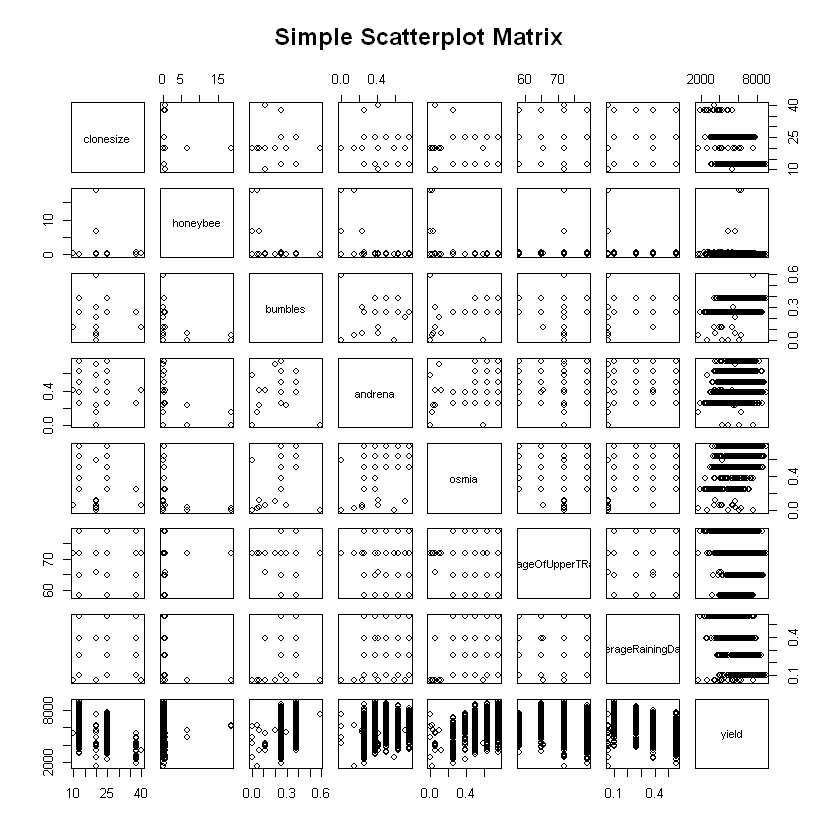

In [49]:
# Scattor plots
pairs(~clonesize+honeybee+bumbles+andrena+osmia+AverageOfUpperTRange+AverageRainingDays+yield,
      main="Simple Scatterplot Matrix",data = df1) 

In [51]:
logyield = log(df1$yield)
logard = log(df1$AverageRainingDays)
logautr = log(df1$AverageOfUpperTRange)


In [52]:
attach(df1)

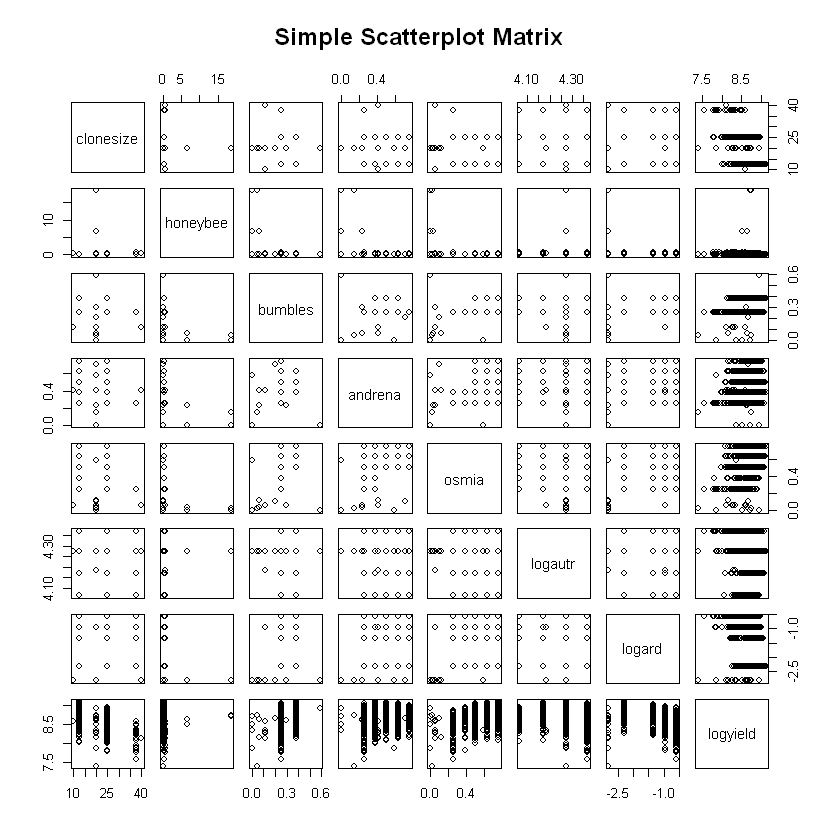

In [53]:
pairs(~clonesize+honeybee+bumbles+andrena+osmia+logautr+logard+logyield,
      main="Simple Scatterplot Matrix") 

In [61]:
# Linear REg Model2
ln_model2 = lm(logyield ~clonesize+honeybee+bumbles+andrena+osmia+AverageOfUpperTRange+AverageRainingDays) 

In [62]:
summary(ln_model2)


Call:
lm(formula = logyield ~ clonesize + honeybee + bumbles + andrena + 
    osmia + AverageOfUpperTRange + AverageRainingDays)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90242 -0.07365  0.01487  0.07798  0.24472 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           9.0589121  0.0460336 196.789  < 2e-16 ***
clonesize            -0.0174862  0.0006023 -29.033  < 2e-16 ***
honeybee              0.0283707  0.0044352   6.397 2.76e-10 ***
bumbles               1.0977663  0.0672260  16.329  < 2e-16 ***
andrena               0.1315300  0.0282008   4.664 3.66e-06 ***
osmia                 0.4225200  0.0284420  14.855  < 2e-16 ***
AverageOfUpperTRange -0.0059765  0.0005398 -11.073  < 2e-16 ***
AverageRainingDays   -0.8386902  0.0243601 -34.429  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1152 on 769 degrees of freedom
Multiple R-squared:  0.7918,	Adjusted R-squared: 

In [ ]:
# log transformation doesnot seems to work here
# !!!!!!!!!!!!!!!!